In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam



2024-01-10 00:23:26.541354: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 00:23:26.573056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 00:23:26.573091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 00:23:26.573969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 00:23:26.579376: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import pandas as pd

In [3]:
import numpy as np 

In [4]:
df=pd.read_csv('breast.csv')

In [5]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [6]:
X=df.drop(['diagnosis','id'],axis=1)

In [7]:
X


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
y=df['diagnosis']

In [9]:
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [10]:
X = (X - X.mean()) / X.std()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

/home/deadsoul/.local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/deadsoul/.local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/deadsoul/.local/lib/python3.11/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


2024-01-10 00:23:37.999104: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-10 00:23:38.029328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-10 00:23:38.029496: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

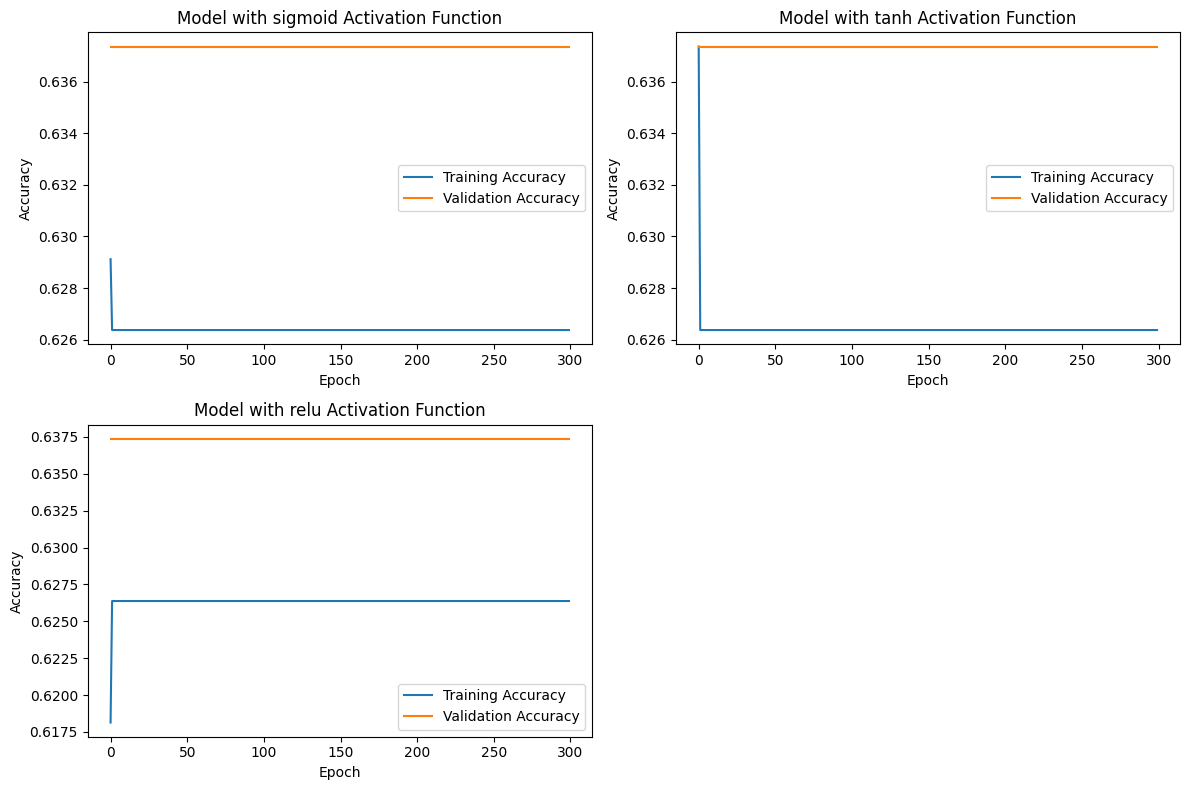

In [13]:


def create_and_train_model(activation_function):
    model = Sequential()
    model.add(Dropout(0.5))
    model.add(Dense(units=128, activation=activation_function, input_dim=x_train.shape[1]))
    model.add(Dense(units=32, activation=activation_function))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and collect the training history
    history = model.fit(x_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=0)

    return model, history

# Define activation functions
activation_functions = ['sigmoid', 'tanh', 'relu']

# Create and train models with different activation functions
models = []
histories = []

for activation_function in activation_functions:
    model, history = create_and_train_model(activation_function)
    models.append(model)
    histories.append(history)

# Evaluate and plot the performance of each activation function
plt.figure(figsize=(12, 8))

for i, activation_function in enumerate(activation_functions):
    plt.subplot(2, 2, i+1)
    plt.plot(histories[i].history['loss'], label='Training Accuracy')
    plt.plot(histories[i].history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model with {activation_function} Activation Function')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


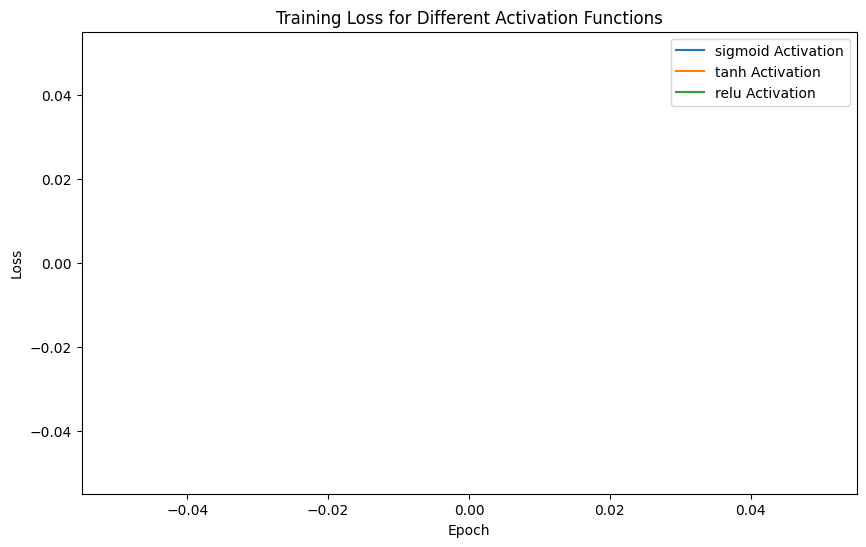

In [14]:
def create_and_train_model(activation_function):
    model = Sequential()
    model.add(Dropout(0.5))
    model.add(Dense(units=128, activation=activation_function, input_dim=x_train.shape[1]))
    model.add(Dense(units=64, activation=activation_function))        
    model.add(Dense(units=32, activation=activation_function))
    model.add(Dense(units=16, activation=activation_function))
    model.add(Dense(units=4, activation=activation_function))
    model.add(Dense(units=2, activation=activation_function))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and collect the training history
    history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

    return model, history

# Define activation functions
activation_functions = ['sigmoid', 'tanh', 'relu']

# Create and train models with different activation functions
models = []
histories = []

for activation_function in activation_functions:
    model, history = create_and_train_model(activation_function)
    models.append(model)
    histories.append(history)

# Evaluate and plot the performance of each activation function
plt.figure(figsize=(10, 6))

for i, activation_function in enumerate(activation_functions):
    plt.plot(histories[i].history['loss'], label=f'{activation_function} Activation')

plt.title('Training Loss for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()